In [18]:
library(tidyverse)
library(lubridate)
library(MASS)


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [2]:
#Read data
data = tibble(read.csv("data/YERockfish.csv"))
data

date,length,age,maturity,stage
9/2/2003,31,10,Immature,1
10/7/2002,32,6,Immature,1
7/18/2000,32,11,Immature,1
6/11/2001,32,11,Immature,2
8/8/2000,32,13,Immature,2
10/4/2003,33,9,Immature,1
7/17/2000,33,10,Immature,1
8/18/2002,34,8,Immature,1
7/12/2000,34,10,Immature,1
7/25/2000,34,11,Immature,1


In [3]:
#Date Column
data = data %>% mutate(data,
      DateR= as.POSIXct(x=data$date, format= "%m/%d/%Y"))
data

date,length,age,maturity,stage,DateR
9/2/2003,31,10,Immature,1,2003-09-02
10/7/2002,32,6,Immature,1,2002-10-07
7/18/2000,32,11,Immature,1,2000-07-18
6/11/2001,32,11,Immature,2,2001-06-11
8/8/2000,32,13,Immature,2,2000-08-08
10/4/2003,33,9,Immature,1,2003-10-04
7/17/2000,33,10,Immature,1,2000-07-17
8/18/2002,34,8,Immature,1,2002-08-18
7/12/2000,34,10,Immature,1,2000-07-12
7/25/2000,34,11,Immature,1,2000-07-25


In [26]:
#dttm
head(data)
glimpse(data)


#why is head(data) not showing dttm, etc.

date,length,age,maturity,stage,DateR,year
9/2/2003,31,10,Immature,1,2003-09-02,2003
10/7/2002,32,6,Immature,1,2002-10-07,2002
7/18/2000,32,11,Immature,1,2000-07-18,2000
6/11/2001,32,11,Immature,2,2001-06-11,2001
8/8/2000,32,13,Immature,2,2000-08-08,2000
10/4/2003,33,9,Immature,1,2003-10-04,2003


Rows: 158
Columns: 7
$ date     <fct> 9/2/2003, 10/7/2002, 7/18/2000, 6/11/2001, 8/8/2000, 10/4/200…
$ length   <int> 31, 32, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 3…
$ age      <int> 10, 6, 11, 11, 13, 9, 10, 8, 10, 11, 11, 12, 10, 10, 10, 12, …
$ maturity <fct> Immature, Immature, Immature, Immature, Immature, Immature, I…
$ stage    <fct> 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1…
$ DateR    <dttm> 2003-09-02, 2002-10-07, 2000-07-18, 2001-06-11, 2000-08-08, …
$ year     <dbl> 2003, 2002, 2000, 2001, 2000, 2003, 2000, 2002, 2000, 2000, 2…


In [5]:
#row count
glimpse(data)

Rows: 158
Columns: 6
$ date     <fct> 9/2/2003, 10/7/2002, 7/18/2000, 6/11/2001, 8/8/2000, 10/4/200…
$ length   <int> 31, 32, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 3…
$ age      <int> 10, 6, 11, 11, 13, 9, 10, 8, 10, 11, 11, 12, 10, 10, 10, 12, …
$ maturity <fct> Immature, Immature, Immature, Immature, Immature, Immature, I…
$ stage    <fct> 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1…
$ DateR    <dttm> 2003-09-02, 2002-10-07, 2000-07-18, 2001-06-11, 2000-08-08, …


In [6]:
#year function
year(data$DateR)

[1] 2003 2002 2000 2001 2000 2003 2000 2002 2000 2000 2000 2002 2000 2000 2003
 [16] 2000 2003 2000 2000 2000 2002 2002 2000 2000 2002 2002 2003 2000 2000 2002
 [31] 2002 2001 2003 2001 2002 2003 2002 2003 2000 2000 2000 2002 2001 2003 2002
 [46] 2003 2003 2000 2000 2003 2002 2000 2003 2000 2001 2001 2002 2002 2002 2002
 [61] 2003 2003 2002 2002 2002 2003 2001 2002 2001 2003 2002 2003 2000 2000 2003
 [76] 2000 2000 2003 2003 2000 2003 2000 2000 2002 2003 2002 2002 2002 2002 2003
 [91] 2003 2002 2002 2004 2003 2000 2001 2008 2002 2002 2002 2002 2001 2000 2003
[106] 2003 2002 2003 2002 2002 2000 2002 2000 2002 2002 2003 2003 2002 2002 2003
[121] 2003 2002 2002 2003 2002 2002 2001 2002 2002 2002 2004 2003 2000 2003 2004
[136] 2000 2002 2002 2002 2002 2003 2003 2002 2002 2003 2002 2003 2003 2002 2001
[151] 2000 2001 2003 2002 2002 2002 2002 2001

In [7]:
#group by year
data = data %>% mutate (data, year=year(data$DateR))
data %>% group_by(year) %>% summarise(n = n())

year,n
2000,37
2001,14
2002,61
2003,42
2004,3
2008,1


In [8]:
#remove <5
data2 = data %>% filter(year != 2004) %>% filter(year != 2008)
data2 %>% group_by(year) %>% summarise(n = n())
glimpse(data2)

year,n
2000,37
2001,14
2002,61
2003,42


Rows: 154
Columns: 7
$ date     <fct> 9/2/2003, 10/7/2002, 7/18/2000, 6/11/2001, 8/8/2000, 10/4/200…
$ length   <int> 31, 32, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 3…
$ age      <int> 10, 6, 11, 11, 13, 9, 10, 8, 10, 11, 11, 12, 10, 10, 10, 12, …
$ maturity <fct> Immature, Immature, Immature, Immature, Immature, Immature, I…
$ stage    <fct> 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1…
$ DateR    <dttm> 2003-09-02, 2002-10-07, 2000-07-18, 2001-06-11, 2000-08-08, …
$ year     <dbl> 2003, 2002, 2000, 2001, 2000, 2003, 2000, 2002, 2000, 2000, 2…


## Fish Maturity Questions

In [9]:
#drop maturity=NA
data3= data2 %>% drop_na()
glimpse(data3)

Rows: 143
Columns: 7
$ date     <fct> 9/2/2003, 10/7/2002, 7/18/2000, 6/11/2001, 8/8/2000, 10/4/200…
$ length   <int> 31, 32, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 3…
$ age      <int> 10, 6, 11, 11, 13, 9, 10, 8, 10, 11, 11, 12, 10, 10, 10, 12, …
$ maturity <fct> Immature, Immature, Immature, Immature, Immature, Immature, I…
$ stage    <fct> 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1…
$ DateR    <dttm> 2003-09-02, 2002-10-07, 2000-07-18, 2001-06-11, 2000-08-08, …
$ year     <dbl> 2003, 2002, 2000, 2001, 2000, 2003, 2000, 2002, 2000, 2000, 2…


In [10]:
data3 = data3 %>% mutate(data3,
         maturity_dbl = if_else(maturity == "Immature", 0, 1))
glimpse(data3)

Rows: 143
Columns: 8
$ date         <fct> 9/2/2003, 10/7/2002, 7/18/2000, 6/11/2001, 8/8/2000, 10/4…
$ length       <int> 31, 32, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 3…
$ age          <int> 10, 6, 11, 11, 13, 9, 10, 8, 10, 11, 11, 12, 10, 10, 10, …
$ maturity     <fct> Immature, Immature, Immature, Immature, Immature, Immatur…
$ stage        <fct> 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, …
$ DateR        <dttm> 2003-09-02, 2002-10-07, 2000-07-18, 2001-06-11, 2000-08-…
$ year         <dbl> 2003, 2002, 2000, 2001, 2000, 2003, 2000, 2002, 2000, 200…
$ maturity_dbl <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, …


In [11]:
#model fish maturity
lm(data3$maturity_dbl~data3$length)


Call:
lm(formula = data3$maturity_dbl ~ data3$length)

Coefficients:
 (Intercept)  data3$length  
    -0.52230       0.02871  


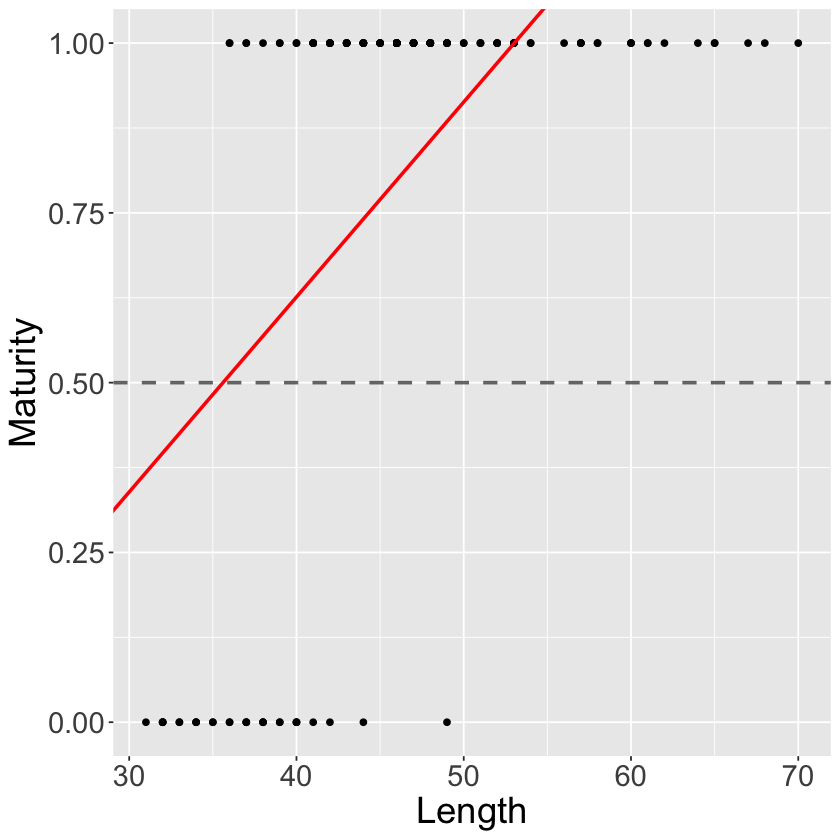

In [12]:
ggplot()+ 
  geom_point(aes(x=data3$length, y=data3$maturity_dbl)) + 
  geom_hline(yintercept=0.5, , linetype="dashed", alpha=0.6, size =1) + 
  geom_abline(intercept =  -0.5223, slope = 0.02871, color ="red", size =1) + 
  xlab("Length") +
  ylab("Maturity") +
  theme(text = element_text(size = 22))   

In [13]:
#plot fish maturity (sigmoid)
logistic_reg_model = glm(data=data3, maturity_dbl~length, family="binomial")
summary(logistic_reg_model)
logistic_reg_model$coefficients[1]


Call:
glm(formula = maturity_dbl ~ length, family = "binomial", data = data3)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.15469   0.00579   0.14971   0.30637   1.76230  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -18.71729    3.65643  -5.119 3.07e-07 ***
length        0.48340    0.09102   5.311 1.09e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 144.217  on 142  degrees of freedom
Residual deviance:  66.287  on 141  degrees of freedom
AIC: 70.287

Number of Fisher Scoring iterations: 7


(Intercept) 
  -18.71729

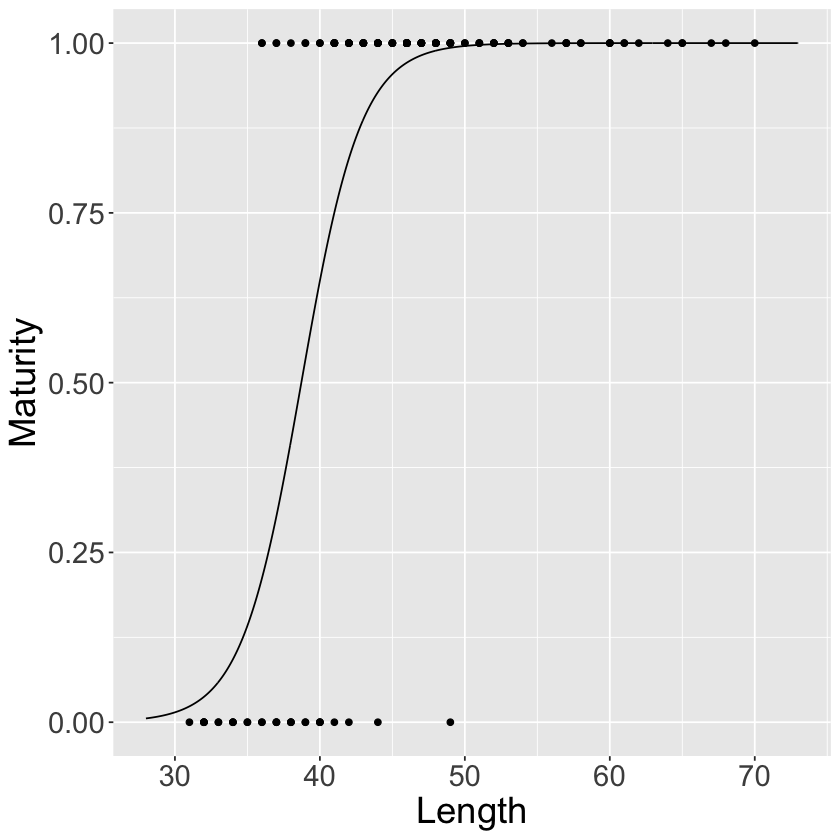

In [14]:
beta_0 = logistic_reg_model$coefficients[1]
beta_1 = logistic_reg_model$coefficients[2]


x_axis = seq(min(data3$length)-3, max(data$length)+3, 0.05)
g_x = 1 / (1+exp(-(beta_0 + beta_1 * x_axis)))
ggplot()+ 
  geom_point(aes(x=data3$length, y=data3$maturity_dbl)) + 
  geom_line(aes(x_axis, g_x)) +
  xlab("Length") +
  ylab("Maturity") +
  theme(text = element_text(size = 22))   

#### Probability of picking a mature fish by length = 50%
Around 38


In [15]:
#era column
data4 = data3 %>% mutate(data3,
         era = if_else(year<2002, "pre_2000", "era2002 and after"))
data4 = data4 %>% mutate(data4,
         era_dbl = if_else(year<2002, 0, 1))
data4

date,length,age,maturity,stage,DateR,year,maturity_dbl,era,era_dbl
9/2/2003,31,10,Immature,1,2003-09-02,2003,0,era2002 and after,1
10/7/2002,32,6,Immature,1,2002-10-07,2002,0,era2002 and after,1
7/18/2000,32,11,Immature,1,2000-07-18,2000,0,pre_2000,0
6/11/2001,32,11,Immature,2,2001-06-11,2001,0,pre_2000,0
8/8/2000,32,13,Immature,2,2000-08-08,2000,0,pre_2000,0
10/4/2003,33,9,Immature,1,2003-10-04,2003,0,era2002 and after,1
7/17/2000,33,10,Immature,1,2000-07-17,2000,0,pre_2000,0
8/18/2002,34,8,Immature,1,2002-08-18,2002,0,era2002 and after,1
7/12/2000,34,10,Immature,1,2000-07-12,2000,0,pre_2000,0
7/25/2000,34,11,Immature,1,2000-07-25,2000,0,pre_2000,0


In [19]:
#era and length with maturity as outcome
#logistic regression, stepAIC


mlm_model = lm(maturity_dbl~ length + era_dbl, data = data4)
summary(mlm_model)
stepAIC(mlm_model)



Call:
lm(formula = maturity_dbl ~ length + era_dbl, data = data4)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9081 -0.2119  0.1195  0.2300  0.5300 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.524159   0.160674  -3.262  0.00139 ** 
length       0.027616   0.003541   7.799  1.3e-12 ***
era_dbl      0.079100   0.059946   1.320  0.18915    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3308 on 140 degrees of freedom
Multiple R-squared:  0.3373,	Adjusted R-squared:  0.3278 
F-statistic: 35.62 on 2 and 140 DF,  p-value: 3.114e-13


Start:  AIC=-313.4
maturity_dbl ~ length + era_dbl

          Df Sum of Sq    RSS     AIC
- era_dbl  1    0.1905 15.512 -313.64
<none>                 15.322 -313.40
- length   1    6.6562 21.978 -263.81

Step:  AIC=-313.64
maturity_dbl ~ length

         Df Sum of Sq    RSS     AIC
<none>                15.512 -313.64
- length  1    7.6069 23.119 -258.57



Call:
lm(formula = maturity_dbl ~ length, data = data4)

Coefficients:
(Intercept)       length  
   -0.52230      0.02871  


### According to the stepAIC function, only length influences maturity

In [24]:
#ANOVA
aov_results = aov( formula = maturity_dbl ~ length + era_dbl, data = data4 )
summary(aov_results)

             Df Sum Sq Mean Sq F value   Pr(>F)    
length        1  7.607   7.607  69.508 6.41e-14 ***
era_dbl       1  0.191   0.191   1.741    0.189    
Residuals   140 15.321   0.109                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### According to the ANOVA, length is significant to maturity, the era is not